In [16]:
!pip install EMD-signal

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 1.6 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.4/119.4 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 6.0 MB/s eta 0:00:00
  Attempting uninstall: dill
    Found existing installation: dill 0.3.8
    Uninstalling dill-0.3.8:
      Successfully uninstalled dill-0.3.8
  Attempting uninstall: multiprocess
    Found existing installation: multiprocess 0.70.16
    Uninstalling multiprocess-0.70.16:
      Successfully uninstalled multiprocess-0.70.16
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
apache-beam 2.46.0 requires cloudpickle~=2.2.1, but you have cloudpickle 3.0.0 which is incompatible.
apache-beam 2.46.0 requires dill<0.3.2,>=0.3.1.1, but you have dill 0.3.9 which is incompatible.
apache-beam 2.46.0 requires numpy<1.25.0,>=1.14.3, bu

In [17]:
import numpy as np
import os
import matplotlib.pyplot as plt
from PyEMD import EMD

### Interictal and Ictal EEG

In [6]:
#path to data and label files
data_path = '/kaggle/input/data-segmentation-bsp-project/interictal_ictal.npy'
label_path = '/kaggle/input/data-segmentation-bsp-project/interictal_ictal_labels.npy'

#load data and labels
data = np.load(data_path)
labels = np.load(label_path)

In [12]:
#extract interictal and ictal EEGs
ictal_ids,_ =np.where(labels==1)
interictal_ids,_ = np.where(labels==0)

ict_id = ictal_ids[0]
int_id = interictal_ids[0]

ictal_eeg = data[ict_id]
interictal_eeg = data[int_id]

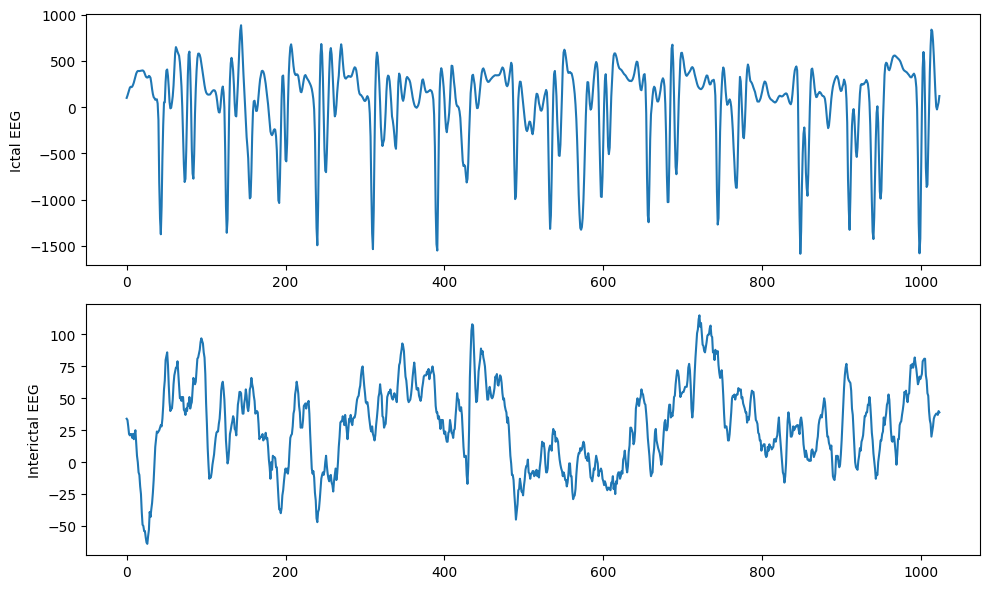

In [15]:
#plot EEG segments
fig, ax = plt.subplots(2,1, figsize=(10,6))

ax[0].plot(ictal_eeg)
ax[0].set_ylabel('Ictal EEG')

ax[1].plot(interictal_eeg)
ax[1].set_ylabel('Interictal EEG')

plt.tight_layout()
plt.savefig('ictal_interictal_eeg.png')
plt.show()

### Intrinsic Mode Functions of Ictal and Interical EEG (First 5)

#### Ictal EEG

In [40]:
#create an instance of EMD class
find_emd = EMD()

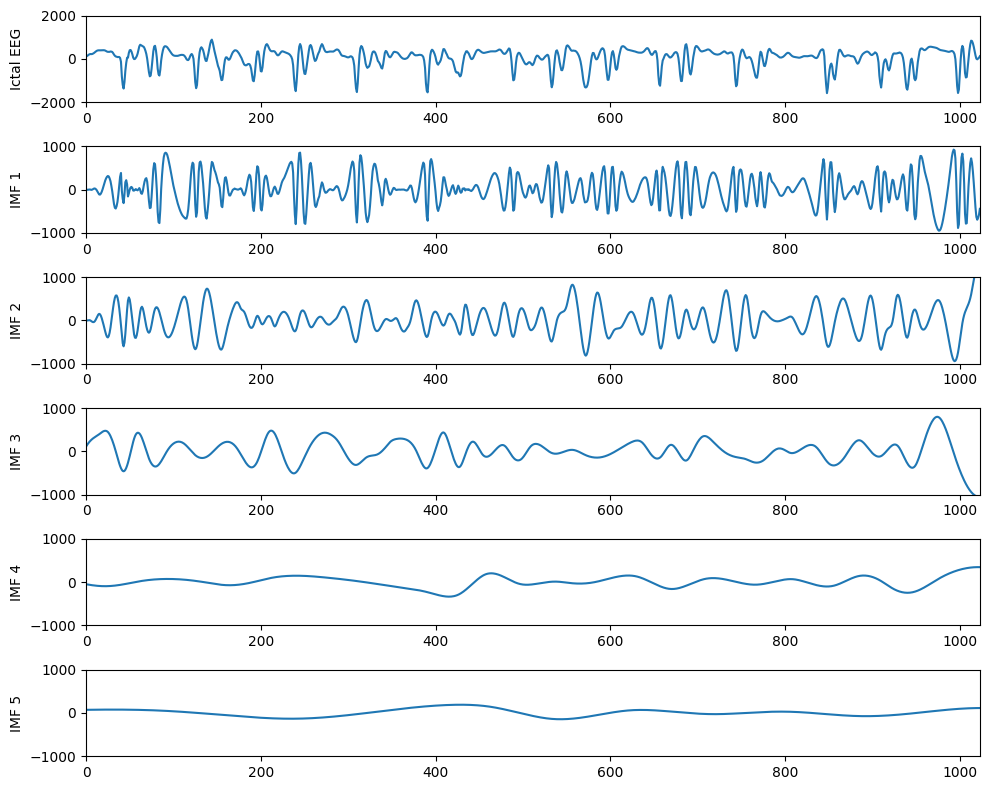

In [41]:
#decompose the ictal EEG segment
ictal_imfs = find_emd(ictal_eeg)

#plot EEG signal and first 5 IMFs
fig, ax = plt.subplots(6,1, figsize=(10,8))

ax[0].plot(ictal_eeg)
ax[0].set_ylabel('Ictal EEG')
ax[0].set_ylim(-2000,2000)
ax[0].set_xlim(left=0, right=1023)

for i in range (1,6):
    ax[i].plot(ictal_imfs[i-1])
    ax[i].set_ylabel(f'IMF {i}')
    ax[i].set_ylim(-1000,1000)
    ax[i].set_xlim(left=0, right=1023)
    
plt.tight_layout()
plt.savefig('ictal_first5_imsfs.png')
plt.show()

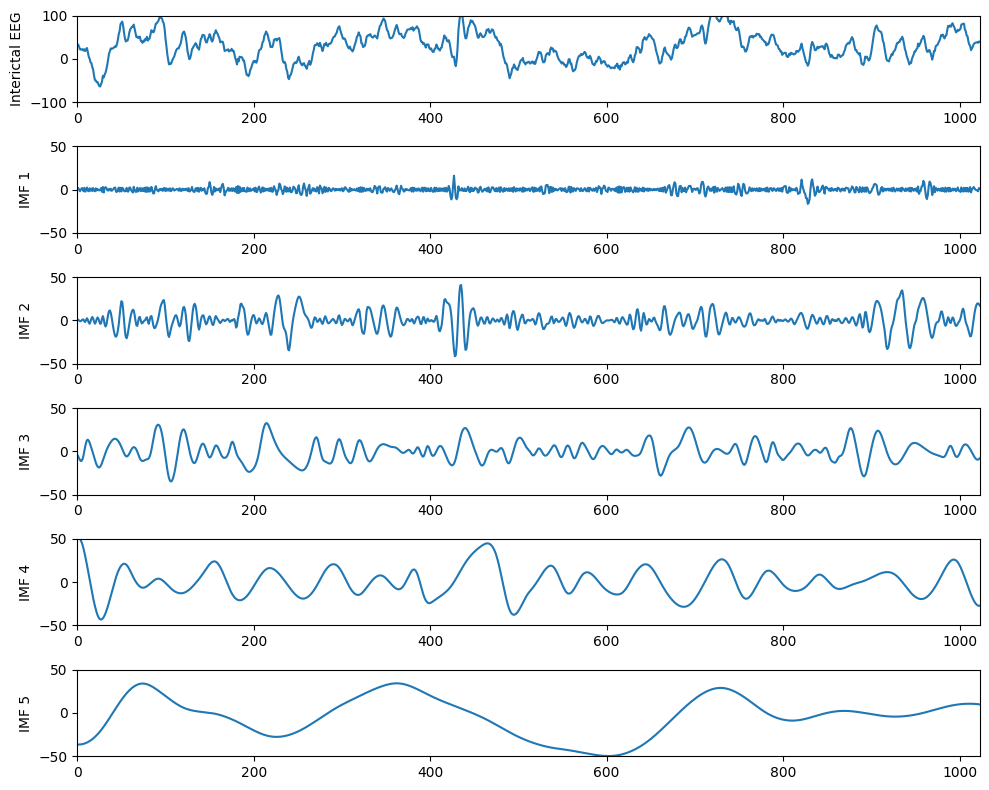

In [44]:
#decompose the ictal EEG segment
interictal_imfs = find_emd(interictal_eeg)

#plot EEG signal and first 5 IMFs
fig, ax = plt.subplots(6,1, figsize=(10,8))

ax[0].plot(interictal_eeg)
ax[0].set_ylabel('Interictal EEG')
ax[0].set_ylim(-100,100)
ax[0].set_xlim(left=0, right=1023)

for i in range (1,6):
    ax[i].plot(interictal_imfs[i-1])
    ax[i].set_ylabel(f'IMF {i}')
    ax[i].set_ylim(-50,50)
    ax[i].set_xlim(left=0, right=1023)
    
plt.tight_layout()
plt.savefig('interictal_first5_imsfs.png')
plt.show()